# Linear Regression and Correlation: A Biginner's Guide by Scott Hartshorn
## R Squared Example

In [26]:
import polars as pl
import pandas as pd
import plotnine as p9
import numpy as np

In [60]:
def plot_yY(df):
    return ( p9.ggplot(data=df, mapping=p9.aes(x='x'))
             + p9.geom_point(mapping=p9.aes(y='y'), color='blue')
             + p9.geom_line(mapping=p9.aes(y='Y'), color='red')
             + p9.theme(figure_size=(5,5))
            )

def r_sqared(df):
    sst = ((df['y'] - df['y'].mean())**2).sum()
    ssr = ((df['y'] - df['Y'])**2).sum()
    rsq = 1 - ssr/sst
    print(f'Sum Squared Total Error: {sst:.2f}')
    print(f'Sum Squared Regression Error: {ssr:.2f}')
    print(f"R Squared is {rsq:.3f}")
    print(f"SSr/SSt = {(ssr/sst)*100:.2f}% of the Total Error remaining.")

### Data
```python
x = [0,1,2,3,4,5,6]
y = x**2
```
### Regression Line
```python
Y = 6x - 5
```

### Overlap <ins>the available data(y)</ins> and <ins>the predicted data(Y)</ins> in the same graph

shape: (7, 3)
┌─────┬─────┬─────┐
│ x   ┆ y   ┆ Y   │
│ --- ┆ --- ┆ --- │
│ i64 ┆ i64 ┆ i64 │
╞═════╪═════╪═════╡
│ 0   ┆ 0   ┆ -5  │
│ 1   ┆ 1   ┆ 1   │
│ 2   ┆ 4   ┆ 7   │
│ 3   ┆ 9   ┆ 13  │
│ 4   ┆ 16  ┆ 19  │
│ 5   ┆ 25  ┆ 25  │
│ 6   ┆ 36  ┆ 31  │
└─────┴─────┴─────┘


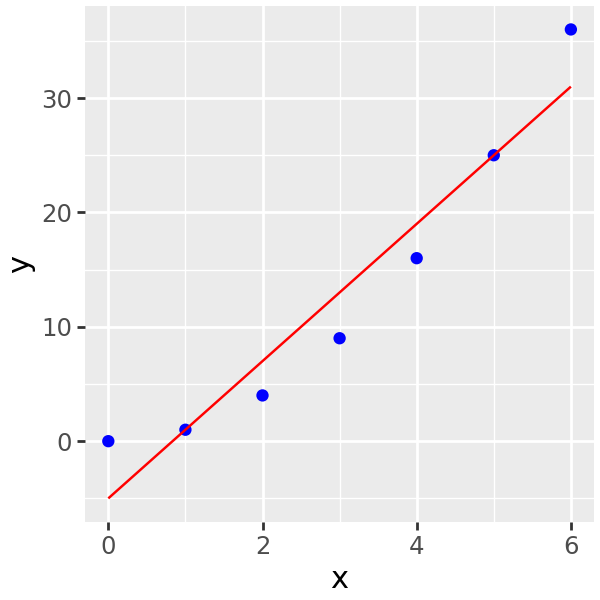

In [28]:
df = pl.DataFrame({'x':[0,1,2,3,4,5,6]})
df = df.with_columns( pl.Series("y", [ x**2 for x in df.get_column('x')]) )
df = df.with_columns( pl.Series("Y", [ x*6-5 for x in df.get_column('x')]) )
print(df)
plot = ( p9.ggplot(data=df, mapping=p9.aes(x='x'))
         + p9.geom_point(mapping=p9.aes(y='y'), color='blue')
         + p9.geom_line(mapping=p9.aes(y='Y'), color='red')
         + p9.theme(figure_size=(3,3))
       )
plot

### Use of long form data

* plotnine에서는 각 데이터셋을 시각적으로 구분하려면 데이터를 긴 형태(**long format**)로 바꾸고, 색상 구분을 위한 변수(예: **label 또는 dataset**)를 만들어 color aesthetic에 매핑해야 합니다.
* 현재는 y와 Y라는 두 열을 따로 시각화하고 있어서 색상 제어가 어렵습니다.
* 아래는 Polars 데이터프레임을 long-form으로 변환한 후, plotnine에서 서로 다른 색으로 표시하는 예제입니다:
* **unpivot()**
> is useful to massage a DataFrame into a format where one or more columns are **identifier variables (index)**  
> while all other columns, considered **measured variables (on)**, are **"unpivoted"** to the row axis  
> leaving just two non-identifier columns,  
>    * 'variable'
>    * 'value'.

shape: (14, 3)
┌─────┬───────┬───────┐
│ x   ┆ label ┆ value │
│ --- ┆ ---   ┆ ---   │
│ i64 ┆ str   ┆ i64   │
╞═════╪═══════╪═══════╡
│ 0   ┆ y     ┆ 0     │
│ 1   ┆ y     ┆ 1     │
│ 2   ┆ y     ┆ 4     │
│ 3   ┆ y     ┆ 9     │
│ 4   ┆ y     ┆ 16    │
│ …   ┆ …     ┆ …     │
│ 2   ┆ Y     ┆ 7     │
│ 3   ┆ Y     ┆ 13    │
│ 4   ┆ Y     ┆ 19    │
│ 5   ┆ Y     ┆ 25    │
│ 6   ┆ Y     ┆ 31    │
└─────┴───────┴───────┘


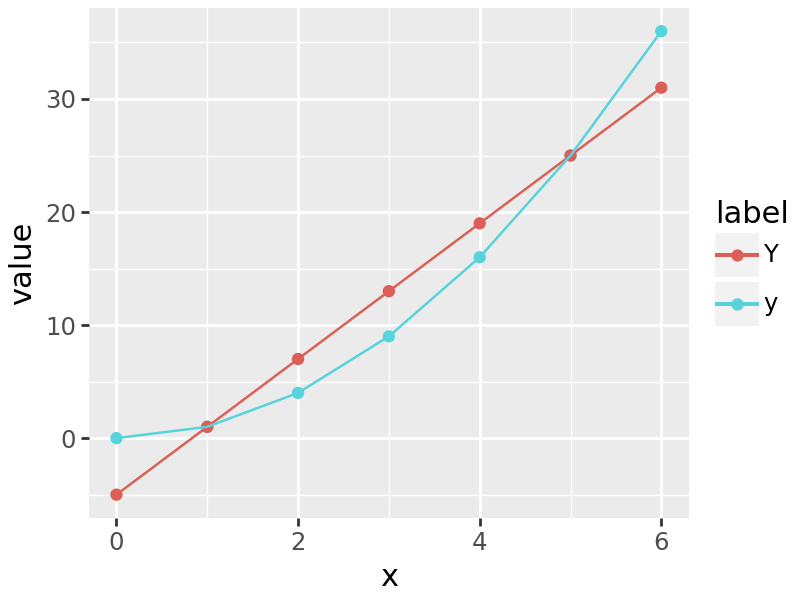

In [29]:
# long-form으로 변환
df_long = df.unpivot(index=["x"], on=["y", "Y"], variable_name="label", value_name="value")
print(df_long)

plot = (
    p9.ggplot(data=df_long, mapping=p9.aes(x='x', y='value', color='label'))
    + p9.geom_point()
    + p9.geom_line()
    + p9.theme(figure_size=(4, 3))
)

plot

shape: (14, 3)
┌─────┬─────┬─────┐
│ x   ┆ y   ┆ gg  │
│ --- ┆ --- ┆ --- │
│ i64 ┆ i64 ┆ str │
╞═════╪═════╪═════╡
│ 0   ┆ 0   ┆ a   │
│ 1   ┆ 1   ┆ a   │
│ 2   ┆ 4   ┆ a   │
│ 3   ┆ 9   ┆ a   │
│ 4   ┆ 16  ┆ a   │
│ …   ┆ …   ┆ …   │
│ 2   ┆ 7   ┆ b   │
│ 3   ┆ 13  ┆ b   │
│ 4   ┆ 19  ┆ b   │
│ 5   ┆ 25  ┆ b   │
│ 6   ┆ 31  ┆ b   │
└─────┴─────┴─────┘


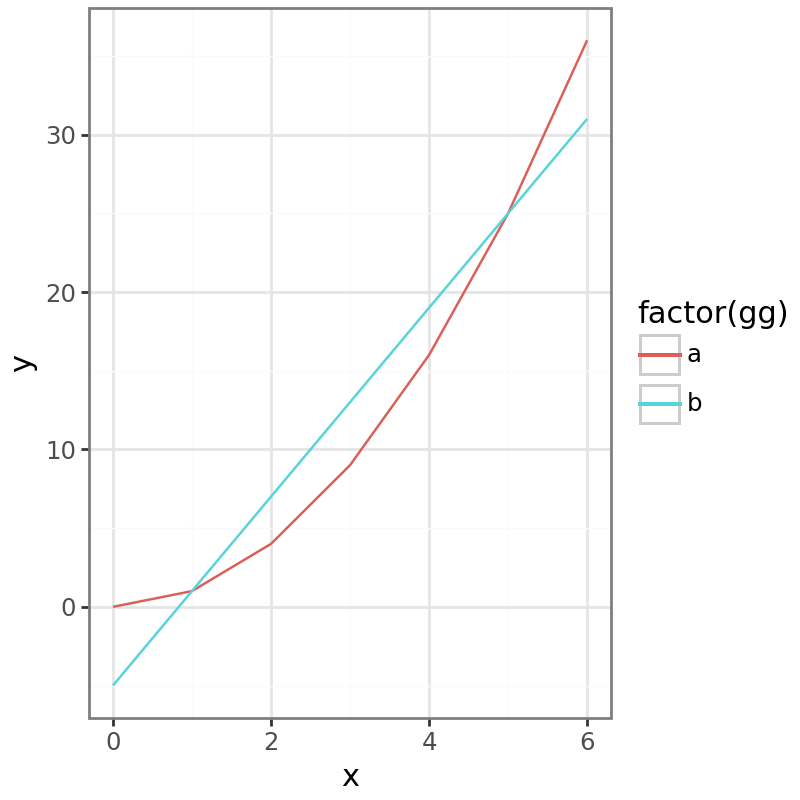

In [30]:
# unpivot()을 사용하지 않고, long form 데이터셋 만들기
df2 = pl.concat( [df.select(['x', 'y']), df.select(['x','Y']).rename({'Y':'y'})] )
df2 = df2.with_columns( pl.Series( 'gg', list( 'a'*df.shape[0] + 'b'*df.shape[0] ) ) )
print(df2)

plot = ( p9.ggplot(data=df2,
            mapping=p9.aes(x='x', y='y', color='factor(gg)')) 
            + p9.geom_line()
            + p9.theme_bw()
            + p9.theme(figure_size=(4,4))
            )
plot

### Calculate $R^2$

* $R^2 = 1 - \frac{SS_{regression}}{SS_{total}}$
* $SS_{regression} = \sum{(y_i - \hat{y})^2}$
* $SS_{total} = \sum{(y_i - \overline{y})^2}$

In [32]:
print(df)
sst = ((df['y'] - df['y'].mean())**2).sum()
ssr = ((df['y'] - df['Y'])**2).sum()
rsq = 1 - ssr/sst
print(f"R Squared is {rsq:.3f}")
print(f"SSr/SSt = {(ssr/sst)*100:.2f}% of the Total Error remaining.")

shape: (7, 3)
┌─────┬─────┬─────┐
│ x   ┆ y   ┆ Y   │
│ --- ┆ --- ┆ --- │
│ i64 ┆ i64 ┆ i64 │
╞═════╪═════╪═════╡
│ 0   ┆ 0   ┆ -5  │
│ 1   ┆ 1   ┆ 1   │
│ 2   ┆ 4   ┆ 7   │
│ 3   ┆ 9   ┆ 13  │
│ 4   ┆ 16  ┆ 19  │
│ 5   ┆ 25  ┆ 25  │
│ 6   ┆ 36  ┆ 31  │
└─────┴─────┴─────┘
R Squared is 0.923
SSr/SSt = 7.69% of the Total Error remaining.


> Basically, if someone had just given us **the y values**,  
> and then told us that they were **randomly ordering those y values**  
> and we had to guess **what they all were**,  
> the best guess we could have made was **the mean for each one**.  
> But if now they give us **the x value**, and tell us to try **to guess the Y value**,  
> we can use **the linear regression line** 
> and remove **92.31% of the error** from our guess.

> Any $R^2$ value above 0.0 indicates that there could be some **correlation** between **the variable** and **the result**,  
> although very low values are likely just **random noise**.